# Classification 
The aim of this project is to build a model that predicts the top genre a song belongs to.

# Preprocessing

Necessary libraries and modules for performing a classification analysis are imported

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB

The train data set is imported

In [12]:
data_train = pd.read_csv("CS98XClassificationTrain.csv")

In [13]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


Here we grouped the data by artist and top genre, this helps in analyzing whether certain musical genres tend to be associated with certain musical characteristics, or to compare the popularity of different artists within the same genre. By grouping the data in this way, we can more easily analyze and compare the musical characteristics of each artist within each genre.

In [14]:
df = data_train.groupby(['artist', 'top genre'])

In [15]:
df.first()

,,Id,title,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
artist,top genre,,,,,,,,,,,,,
*NSYNC,boy band,452,It's Gonna Be Me,2000,165,87,64,-5,6,88,191,5,8,62
50 Cent,east coast hip hop,383,In Da Club,2003,90,71,90,-3,7,78,193,26,37,77
ABBA,europop,40,Voulez-Vous,1979,127,77,71,-7,17,90,309,15,4,63
ATB,german dance,113,Don't Stop,1999,134,94,71,-5,32,57,221,15,4,56
Adam Faith,brill building pop,14,What Do You Want,1989,147,37,55,-9,24,85,98,84,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitney Houston,dance pop,248,I Have Nothing - Film Version,2017,153,45,49,-9,9,17,296,76,3,61
Yazoo,dance rock,405,Only You,1982,106,31,75,-17,8,85,194,33,4,65
Youngbloodz,atl hip hop,342,Snap Yo Fingers,2006,82,76,84,-5,29,63,274,1,23,68


In [16]:
data_train.rename({'pop': 'popularity'}, axis=1, inplace=True)

In [17]:
data_train.isna().sum()

Id             0
title          0
artist         0
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
top genre     15
dtype: int64

Since there are null values in top genre , we are dropping the missing values

In [18]:
#Remove nulls
data_train.dropna(inplace=True)

In [19]:
data_train.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
top genre     0
dtype: int64

The statistics shown include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each of the columns.
These statistics provide a quick and easy way to get a sense of the distribution of the data and to identify potential issues, such as outliers or missing values.

In [20]:
data_train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,227.600457,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,130.463047,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,116.250000,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,226.500000,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,340.750000,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


Now we convert the duration column of the dataset from seconds to minutes. This is because the original values of duration are in seconds, which can be a very large number for some songs, and converting it to minutes can make it easier to work with and interpret.


In [21]:
data_train['dur'] = data_train[['dur']]/60

In [22]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,2.500000,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,4.083333,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,3.866667,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,3.216667,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,3.716667,15,6,74,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,3.566667,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,2.450000,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,4.816667,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,3.183333,5,8,62,boy band


In [385]:
# cols = data_train.loc[: , "bpm":"nrgy":"dnce":"dB":"live":"acous"]
# data_train['aud_mean'] = cols.mean(axis=1)
# data_train['aud_mean']  = data_train[['bpm', 'nrgy','dnce','dB','live','val','acous','spch']].mean(axis=1)


In [23]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,2.500000,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,4.083333,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,3.866667,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,3.216667,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,3.716667,15,6,74,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,3.566667,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,2.450000,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,4.816667,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,3.183333,5,8,62,boy band


The heatmap is a useful tool for quickly visualizing the correlation between different variables in a dataset. It helps to identify which features are strongly correlated, which may be used to reduce dimensionality or for other types of analyses.

<AxesSubplot:>

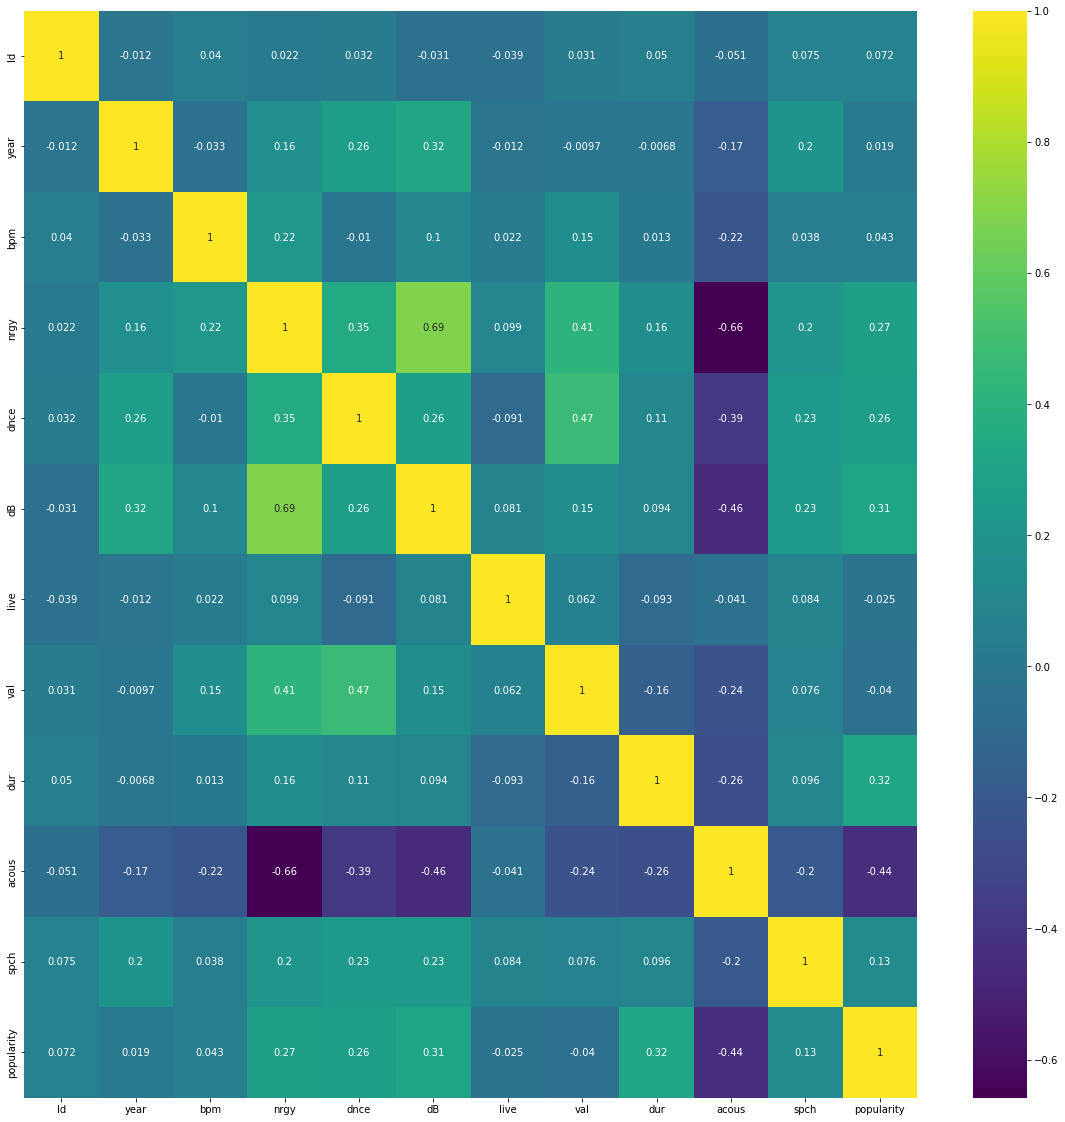

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(data_train.corr(),annot=True,cmap='viridis')

The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.

Looking at the heatmap, we can see that some features are strongly positively correlated with each other, such as 'dnce' and 'val' (0.47), 'nrgy' and 'dB' (0.69), 'dB' and 'popularity' (0.31), and 'dur' and 'popularity' (0.32). On the other hand, some features are strongly negatively correlated, such as 'acous' and 'nrgy' (-0.66) and 'acous' and 'popularity' (-0.44).

Some features have weak or no correlation with other features, such as 'year' with most of the other features, and 'spch' with most of the other features. This indicates that these features may not be as important in predicting the target variable, and may be dropped in a feature selection process.

In [388]:
# #0 popular, 1 -non popular
# # data_train['pop category'] = [0 if x > 55 else 1 for x in data_train['popularity']]
# data_train['pop category']= pd.cut(data_train.popularity,bins=[0,30,70,100],labels=['low','medium','high'])
# #one hot pop category
# oh_p = OneHotEncoder(handle_unknown='ignore')
# oh_popcat = oh_p.fit_transform(data_train[["pop category"]]).toarray()
# data_train = pd.concat([data_train.reset_index(drop=True), pd.DataFrame(oh_popcat)], axis='columns')
# data_train.drop(columns='pop category',inplace=True)

In [389]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,2.500000,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,4.083333,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,3.866667,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,3.216667,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,3.716667,15,6,74,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,3.566667,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,2.450000,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,4.816667,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,3.183333,5,8,62,boy band


In [390]:
# #Process target variable
# genre = (data_train["top genre"].str.strip()).str.lower()
# gen = genre.str.split(" ",0)
# new_genre = []
# for i in gen:
#     new_genre.append(i[-1])
# new_genre=np.array(new_genre)
# data_train['genre'] = new_genre.tolist()
# data_train.drop(columns=['top genre'],axis=1,inplace=True)

In [391]:
# data_train

In [392]:
# data_train['genre'].value_counts()

In [393]:
# #convert the gnere with only one count to "others"
# v = data_train['genre'].value_counts()
# data_train.loc[data_train['genre'].isin(v[v<2].index), 'genre'] = 'others'

In [394]:
# data_train['genre'].value_counts()

The 'aud_mean' column is calculated by taking the mean of the values in five existing columns in the same row: bpm, dnce, dB, val, and acous.

In [26]:
data_train['aud_mean']  = data_train[['bpm', 'dnce','dB','val','acous']].mean(axis=1)

A histogram is created for each numerical columns

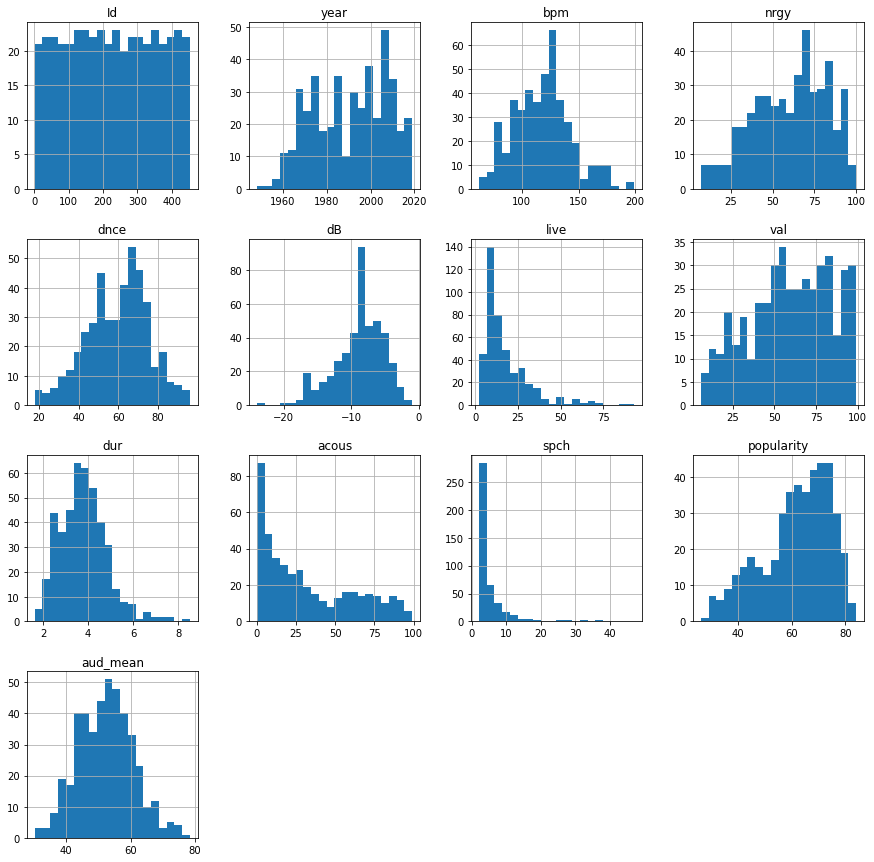

In [28]:
%matplotlib inline
data_train.hist(bins=20, figsize=(15,15))
plt.show()

We can see from the histogram of the numerical features that 'live' , 'speech' , 'acous' are skewed

<AxesSubplot: >

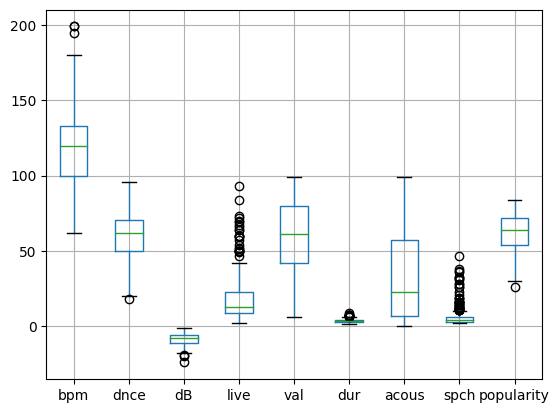

In [397]:
ot_columns = ['bpm','dnce','dB','live','val','dur','acous','spch','popularity']
data_train.boxplot(ot_columns)

We have plotted boxplots for several features (bpm, dnce, dB, live, val, dur, acous, spch, and popularity) in the dataset data_train. This can help to identify any potential outliers in these features and provide a visual representation of the distribution of the data in each feature.

dev = data_train['bpm'].quantile(0.50)
ma = data_train['bpm'].quantile(0.90)
print(dev,ma)
data_train['bpm'] = np.where(data_train['bpm'] > ma, dev, data_train['bpm'])

In [399]:
# dev = data_train['bpm'].quantile(0.50)
# ma = data_train['bpm'].quantile(0.90)
# print(dev,ma)
# data_train['bpm'] = np.where(data_train['bpm'] > ma, dev, data_train['bpm'])

In [400]:
# Q1 = data_train['live'].quantile(0.25)
# Q3 = data_train['live'].quantile(0.75)
# IQR = Q3 - Q1

# # Find the outlier rows
# outliers = data_train[(data_train['live'] < Q1 - 1.5*IQR) | (data_train['live'] > Q3 + 1.5*IQR)]

# # Print the outlier rows
# print(outliers)

In [401]:
# data_train['live'] = winsorize(data_train['live'], limits=[0.05, 0.05])
# data_train['spch'] = winsorize(data_train['spch'], limits=[0.05, 0.05])

Inorder to treat outliers in the dataset for the features 'bpm', 'live', and 'spch', the median value (50th percentile) of the 'bpm' feature and the first quartile (25th percentile), third quartile (75th percentile), and interquartile range (IQR) for the 'live' feature is calculated. Then, we identified rows where the 'live' feature is more than 1.5 times the IQR below the first quartile or above the third quartile. These rows are considered outliers.The outliers in the 'live' and 'spch' features are replaced with values that are within a certain percentile range. The limits parameter is set to [0.05, 0.05], which means that the lowest 5% of the values and the highest 5% of the values will be replaced with the closest non-outlier values. 
 
But we found that the handling of outliers didnot improve the model , this was opted out


<AxesSubplot: >

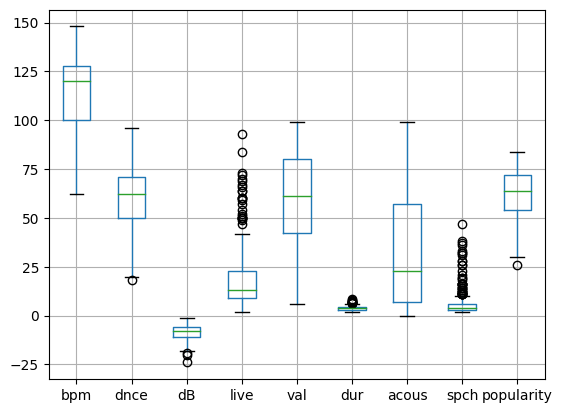

In [402]:
data_train.boxplot(ot_columns)

Since the 'live' feature had so much of outliers and the feature didnot have much relation in determining the genre , this was removed

In [403]:
data_train.drop(columns=['live'],axis=1,inplace=True)

##### The mean of certain features (i.e., "bpm", "dnce", "dB", "val", and "acous") for each artist are calculated and replaced

In [404]:
artist_stats = data_train.groupby("artist").agg({"bpm": "mean", "dnce": "mean","dB": "mean","val": "mean"
                                                   ,"acous": "mean"}).to_dict()
data_train["artist_bpm_mean"] = data_train["artist"].map(artist_stats["bpm"])
data_train["artist_dnce_mean"] = data_train["artist"].map(artist_stats["dnce"])
data_train["artist_dB_mean"] = data_train["artist"].map(artist_stats["dB"])
data_train["artist_val_mean"] = data_train["artist"].map(artist_stats["val"])
data_train["artist_acous_mean"] = data_train["artist"].map(artist_stats["acous"])
# data_train.drop(columns=['artist'],axis=1,inplace=True)

In [405]:
data_train.columns

Index(['Id', 'title', 'artist', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'val',
       'dur', 'acous', 'spch', 'popularity', 'top genre', 'aud_mean',
       'artist_bpm_mean', 'artist_dnce_mean', 'artist_dB_mean',
       'artist_val_mean', 'artist_acous_mean'],
      dtype='object')

In [406]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,spch,popularity,top genre,aud_mean,artist_bpm_mean,artist_dnce_mean,artist_dB_mean,artist_val_mean,artist_acous_mean
0,1,My Happiness,Connie Francis,1996,107.0,31,45,-8,28,2.500000,75,3,44,adult standards,49.4,107.000000,45.000000,-8.000000,28.000000,75.000000
2,3,How Deep Is Your Love,Bee Gees,1979,105.0,36,63,-9,67,4.083333,11,3,77,adult standards,47.4,105.000000,63.000000,-9.000000,67.000000,11.000000
3,4,Woman in Love,Barbra Streisand,1980,120.0,28,47,-16,33,3.866667,25,3,67,adult standards,51.8,126.333333,45.666667,-16.000000,52.666667,40.666667
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121.0,47,56,-8,40,3.216667,45,3,63,glam rock,50.8,120.555556,63.000000,-9.444444,52.222222,36.555556
5,6,Grenade,Bruno Mars,2010,110.0,56,71,-7,23,3.716667,15,6,74,pop,42.4,109.500000,67.500000,-6.000000,33.000000,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80.0,22,18,-17,16,3.566667,92,4,45,adult standards,37.8,76.000000,23.000000,-20.500000,19.000000,92.500000
449,450,Surf City,Jan & Dean,2010,148.0,81,53,-13,96,2.450000,50,3,50,brill building pop,66.8,148.000000,50.000000,-13.500000,95.000000,55.000000
450,451,Dilemma,Nelly,2002,120.0,55,73,-8,61,4.816667,23,14,77,dance pop,63.4,120.000000,73.000000,-8.000000,61.000000,23.000000
451,452,It's Gonna Be Me,*NSYNC,2000,120.0,87,64,-5,88,3.183333,5,8,62,boy band,63.4,120.000000,64.000000,-5.000000,88.000000,5.000000


LabelEncoder is a utility class in scikit-learn that helps to encode categorical data into numerical data. It works by assigning a unique numerical value to each category in a categorical feature.Label encoding assigns a unique numerical value to each category in the column, with the first category being assigned a value of 0, the second category being assigned a value of 1, and so on. Here it is used to encode the categorical variable "genre" into numerical values. But since we found that one-hot encoder gives better performance , it was used.

In [407]:
# #Label encode genre
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_train['genre'] = lab.fit_transform(data_train['genre'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [408]:
# #Label encode artist
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_train['artist'] = lab.fit_transform(data_train['artist'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [409]:
# oh = OneHotEncoder(handle_unknown='ignore')
# oh_artist = pd.DataFrame(oh.fit_transform(data_train[["artist"]]).toarray())

In [410]:
data_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,spch,popularity,top genre,aud_mean,artist_bpm_mean,artist_dnce_mean,artist_dB_mean,artist_val_mean,artist_acous_mean
0,1,My Happiness,Connie Francis,1996,107.0,31,45,-8,28,2.500000,75,3,44,adult standards,49.4,107.000000,45.000000,-8.000000,28.000000,75.000000
2,3,How Deep Is Your Love,Bee Gees,1979,105.0,36,63,-9,67,4.083333,11,3,77,adult standards,47.4,105.000000,63.000000,-9.000000,67.000000,11.000000
3,4,Woman in Love,Barbra Streisand,1980,120.0,28,47,-16,33,3.866667,25,3,67,adult standards,51.8,126.333333,45.666667,-16.000000,52.666667,40.666667
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121.0,47,56,-8,40,3.216667,45,3,63,glam rock,50.8,120.555556,63.000000,-9.444444,52.222222,36.555556
5,6,Grenade,Bruno Mars,2010,110.0,56,71,-7,23,3.716667,15,6,74,pop,42.4,109.500000,67.500000,-6.000000,33.000000,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80.0,22,18,-17,16,3.566667,92,4,45,adult standards,37.8,76.000000,23.000000,-20.500000,19.000000,92.500000
449,450,Surf City,Jan & Dean,2010,148.0,81,53,-13,96,2.450000,50,3,50,brill building pop,66.8,148.000000,50.000000,-13.500000,95.000000,55.000000
450,451,Dilemma,Nelly,2002,120.0,55,73,-8,61,4.816667,23,14,77,dance pop,63.4,120.000000,73.000000,-8.000000,61.000000,23.000000
451,452,It's Gonna Be Me,*NSYNC,2000,120.0,87,64,-5,88,3.183333,5,8,62,boy band,63.4,120.000000,64.000000,-5.000000,88.000000,5.000000


In [411]:
data_train.isna().sum()

Id                   0
title                0
artist               0
year                 0
bpm                  0
nrgy                 0
dnce                 0
dB                   0
val                  0
dur                  0
acous                0
spch                 0
popularity           0
top genre            0
aud_mean             0
artist_bpm_mean      0
artist_dnce_mean     0
artist_dB_mean       0
artist_val_mean      0
artist_acous_mean    0
dtype: int64

The Standard Scaler scales the data based on mean and standard deviation. It assumes that the data follows a normal distribution and scales the data so that it has a mean of 0 and a standard deviation of 1. However, the standard scaler is sensitive to outliers in the data. If there are outliers in the data, the mean and standard deviation are affected, and the scaled values may not be representative of the true distribution of the data.

On the other hand, Robust Scaler is a technique that scales the data based on percentiles. It is more robust to outliers as it scales the data using the interquartile range (IQR) and the median. This makes it more useful when dealing with data that has a lot of outliers, as it is less affected by them.

Here standard scaler is used to encode 'artist' into numerical values since the variables with outliers were handled and gave better performance than robust scaler

In [412]:
# # Scale the features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scl_attr = ['bpm','dnce','dB','val','dur','acous','aud_mean','spch','popularity','artist_bpm_mean', 'artist_dnce_mean', 'artist_dB_mean',
       'artist_val_mean', 'artist_acous_mean']
ot_columns = ['Id','title','artist','year', 'top genre','nrgy']
# data_train[scl_attr] = std_scaler.fit_transform(data_train[scl_attr])

# scaler = preprocessing.RobustScaler()
# robust_df = scaler.fit(data_train[scl_attr])
# robust_df_scaled = scaler.transform(data_train[scl_attr])
# data_train[scl_attr] = pd.DataFrame(robust_df_scaled)

# scaler = preprocessing.RobustScaler()
robust_df = scaler.fit(data_train[scl_attr])
robust_df_scaled = scaler.transform(data_train[scl_attr])

data_train = pd.concat([data_train[ot_columns].reset_index(drop=True), pd.DataFrame(robust_df_scaled,columns=scl_attr)], axis='columns')


In [413]:
data_train.isna().sum()

Id                   0
title                0
artist               0
year                 0
top genre            0
nrgy                 0
bpm                  0
dnce                 0
dB                   0
val                  0
dur                  0
acous                0
aud_mean             0
spch                 0
popularity           0
artist_bpm_mean      0
artist_dnce_mean     0
artist_dB_mean       0
artist_val_mean      0
artist_acous_mean    0
dtype: int64

In [414]:
data_train.columns

Index(['Id', 'title', 'artist', 'year', 'top genre', 'nrgy', 'bpm', 'dnce',
       'dB', 'val', 'dur', 'acous', 'aud_mean', 'spch', 'popularity',
       'artist_bpm_mean', 'artist_dnce_mean', 'artist_dB_mean',
       'artist_val_mean', 'artist_acous_mean'],
      dtype='object')

In [415]:
data_train

,Id,title,artist,year,top genre,nrgy,bpm,dnce,dB,val,dur,acous,aud_mean,spch,popularity,artist_bpm_mean,artist_dnce_mean,artist_dB_mean,artist_val_mean,artist_acous_mean
0,1,My Happiness,Connie Francis,1996,adult standards,31,-0.351460,-0.960594,0.219596,-1.293363,-1.235386,1.463706,-0.330910,-0.480003,-1.377590,-0.410995,-1.070221,0.230508,-1.474677,1.568046
1,3,How Deep Is Your Love,Bee Gees,1979,adult standards,36,-0.456324,0.209212,-0.059196,0.301586,0.264116,-0.724593,-0.564984,-0.480003,1.211706,-0.533622,0.233088,-0.062137,0.343864,-0.776245
2,4,Woman in Love,Barbra Streisand,1980,adult standards,28,0.330153,-0.830616,-2.010740,-1.088882,0.058921,-0.245903,-0.050021,-0.480003,0.427071,0.774395,-1.021950,-2.110651,-0.324489,0.310431
3,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,glam rock,47,0.382584,-0.245713,0.219596,-0.802610,-0.556664,0.437941,-0.167058,-0.480003,0.113217,0.420141,0.233088,-0.192201,-0.345213,0.159843
4,6,Grenade,Bruno Mars,2010,pop,56,-0.194165,0.729126,0.498388,-1.497844,-0.083137,-0.587824,-1.150170,0.059077,0.976315,-0.257712,0.558915,0.815797,-1.241531,-0.867819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,449,But Not For Me,Ella Fitzgerald,1959,adult standards,22,-1.767118,-2.715304,-2.289532,-1.784116,-0.225196,2.044972,-1.688540,-0.300310,-1.299126,-2.311707,-2.663155,-3.427552,-1.894341,2.209063
434,450,Surf City,Jan & Dean,2010,brill building pop,81,1.798242,-0.440680,-1.174364,1.487573,-1.282739,0.608902,1.705535,-0.480003,-0.906809,2.102850,-0.708191,-1.379039,1.649484,0.835455
435,451,Dilemma,Nelly,2002,dance pop,55,0.330153,0.859104,0.219596,0.056209,0.958622,-0.314287,1.307609,1.496626,1.211706,0.386078,0.957149,0.230508,0.064089,-0.336691
436,452,It's Gonna Be Me,*NSYNC,2000,boy band,87,0.330153,0.274201,1.055972,1.160404,-0.588233,-0.929746,1.307609,0.418465,0.034753,0.386078,0.305494,1.108442,1.323079,-0.996023


Here Principal Component Analysis (PCA) is used to identify and remove correlated features in the dataset. Correlated features can introduce multicollinearity, which can affect the stability and interpretability of a machine learning model. PCA helps to transform the original features into a new set of uncorrelated features, known as principal components, that explain the maximum variance in the data. By retaining only the top principal components, we can reduce the dimensionality of the data and remove the correlation between features. This can help to reduce overfitting and improve the generalization performance of the machine learning model.

In [416]:
#PCA

pca = PCA(n_components=7)
x_pca = pca.fit_transform(data_train[scl_attr])
data_train = pd.concat([data_train[ot_columns].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')

In [417]:
data_train

,Id,title,artist,year,top genre,nrgy,0,1,2,3,4,5,6
0,1,My Happiness,Connie Francis,1996,adult standards,31,3.040509,-0.001878,-0.527487,-1.786533,0.832540,-0.481223,-0.834275
1,3,How Deep Is Your Love,Bee Gees,1979,adult standards,36,-0.708195,-0.952661,0.593207,0.687157,-1.083150,-0.370469,0.063118
2,4,Woman in Love,Barbra Streisand,1980,adult standards,28,2.041094,0.398324,-1.390635,2.124847,-0.443976,0.655502,-0.172333
3,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,glam rock,47,0.464290,-0.031217,-0.717214,-0.089041,0.321385,-0.519162,-0.770429
4,6,Grenade,Bruno Mars,2010,pop,56,-0.522878,-2.486875,-0.025715,0.214197,0.543531,-0.526030,-1.346015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,449,But Not For Me,Ella Fitzgerald,1959,adult standards,22,7.547151,-0.517848,0.602968,0.718832,-0.396774,1.083881,0.316402
434,450,Surf City,Jan & Dean,2010,brill building pop,81,0.063747,4.267190,-1.856207,0.260152,-0.584074,0.726961,0.133654
435,451,Dilemma,Nelly,2002,dance pop,55,-1.926251,-0.043046,0.387455,0.802221,1.631108,0.287213,0.599465
436,452,It's Gonna Be Me,*NSYNC,2000,boy band,87,-2.590552,0.839784,0.023798,-1.227274,-0.586204,0.367051,0.246728


One hot encoding is a process that converts categorical data into numerical data by creating binary columns for each category of a categorical feature. Each binary column represents one category, and the value of the column is either 0 or 1, depending on whether the corresponding data point belongs to that category or not. One hot encoding helps to prevent the machine learning algorithm from assigning incorrect or inappropriate numerical values to the categories, which can lead to inaccurate predictions or results.
Here the one-hot encoder transforms these artist names into a set of binary features, where each feature corresponds to one artist name.

In [418]:
oh = OneHotEncoder(handle_unknown='ignore')
oh_artist = oh.fit_transform(data_train[["artist"]]).toarray()

In [419]:
oh_artist.shape

(438, 331)

In [420]:
data_train = pd.concat([data_train.reset_index(drop=True), pd.DataFrame(oh_artist)], axis='columns')
data_train.drop(columns='artist',inplace=True)

In [421]:
data_train

,Id,title,year,top genre,nrgy,0,1,2,3,4,...,321,322,323,324,325,326,327,328,329,330
0,1,My Happiness,1996,adult standards,31,3.040509,-0.001878,-0.527487,-1.786533,0.832540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,How Deep Is Your Love,1979,adult standards,36,-0.708195,-0.952661,0.593207,0.687157,-1.083150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Woman in Love,1980,adult standards,28,2.041094,0.398324,-1.390635,2.124847,-0.443976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,Goodbye Yellow Brick Road - Remastered 2014,1973,glam rock,47,0.464290,-0.031217,-0.717214,-0.089041,0.321385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,Grenade,2010,pop,56,-0.522878,-2.486875,-0.025715,0.214197,0.543531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,449,But Not For Me,1959,adult standards,22,7.547151,-0.517848,0.602968,0.718832,-0.396774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,450,Surf City,2010,brill building pop,81,0.063747,4.267190,-1.856207,0.260152,-0.584074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,451,Dilemma,2002,dance pop,55,-1.926251,-0.043046,0.387455,0.802221,1.631108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,452,It's Gonna Be Me,2000,boy band,87,-2.590552,0.839784,0.023798,-1.227274,-0.586204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [422]:
# lab.classes_

In [423]:
# integer_mapping = {l: i for i, l in enumerate(lab.classes_)}

In [424]:
# integer_mapping

Unnecessary features like 'Id', 'title' , 'nrgy' were dropped

In [425]:
#drop unnecessary columns
data_train.drop(columns=['Id','title','nrgy'],axis=1,inplace=True)

In [426]:
data_train

,year,top genre,0,1,2,3,4,5,6,0,...,321,322,323,324,325,326,327,328,329,330
0,1996,adult standards,3.040509,-0.001878,-0.527487,-1.786533,0.832540,-0.481223,-0.834275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1979,adult standards,-0.708195,-0.952661,0.593207,0.687157,-1.083150,-0.370469,0.063118,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,adult standards,2.041094,0.398324,-1.390635,2.124847,-0.443976,0.655502,-0.172333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973,glam rock,0.464290,-0.031217,-0.717214,-0.089041,0.321385,-0.519162,-0.770429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,pop,-0.522878,-2.486875,-0.025715,0.214197,0.543531,-0.526030,-1.346015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1959,adult standards,7.547151,-0.517848,0.602968,0.718832,-0.396774,1.083881,0.316402,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2010,brill building pop,0.063747,4.267190,-1.856207,0.260152,-0.584074,0.726961,0.133654,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,2002,dance pop,-1.926251,-0.043046,0.387455,0.802221,1.631108,0.287213,0.599465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,2000,boy band,-2.590552,0.839784,0.023798,-1.227274,-0.586204,0.367051,0.246728,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
# from sklearn import preprocessing
# # scaler=MinMaxScaler(feature_range=(0,1))
# scaler  = preprocessing.MinMaxScaler(feature_range=(0,1))
# scl_attr = ['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','popularity']
# data_train[scl_attr]=scaler.fit_transform(data_train[scl_attr])

In [428]:
data_train

,year,top genre,0,1,2,3,4,5,6,0,...,321,322,323,324,325,326,327,328,329,330
0,1996,adult standards,3.040509,-0.001878,-0.527487,-1.786533,0.832540,-0.481223,-0.834275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1979,adult standards,-0.708195,-0.952661,0.593207,0.687157,-1.083150,-0.370469,0.063118,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,adult standards,2.041094,0.398324,-1.390635,2.124847,-0.443976,0.655502,-0.172333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973,glam rock,0.464290,-0.031217,-0.717214,-0.089041,0.321385,-0.519162,-0.770429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,pop,-0.522878,-2.486875,-0.025715,0.214197,0.543531,-0.526030,-1.346015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1959,adult standards,7.547151,-0.517848,0.602968,0.718832,-0.396774,1.083881,0.316402,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2010,brill building pop,0.063747,4.267190,-1.856207,0.260152,-0.584074,0.726961,0.133654,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,2002,dance pop,-1.926251,-0.043046,0.387455,0.802221,1.631108,0.287213,0.599465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,2000,boy band,-2.590552,0.839784,0.023798,-1.227274,-0.586204,0.367051,0.246728,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
# y = pd.DataFrame(data_train.loc[:,"genre"])
# x = pd.DataFrame([data_train.loc[:,"bpm"], 
#                                  data_train.loc[:,"nrgy"],
#                                  data_train.loc[:,"dnce"],
#                                  data_train.loc[:,"dB"],
#                                 data_train.loc[:,"live"],
#                   data_train.loc[:,"val"],
#                                 data_train.loc[:,"dur"],
#                  data_train.loc[:,"acous"],
#                  data_train.loc[:,"spch"],
#                  data_train.loc[:,"popularity"]])

In [430]:
data_train

,year,top genre,0,1,2,3,4,5,6,0,...,321,322,323,324,325,326,327,328,329,330
0,1996,adult standards,3.040509,-0.001878,-0.527487,-1.786533,0.832540,-0.481223,-0.834275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1979,adult standards,-0.708195,-0.952661,0.593207,0.687157,-1.083150,-0.370469,0.063118,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,adult standards,2.041094,0.398324,-1.390635,2.124847,-0.443976,0.655502,-0.172333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973,glam rock,0.464290,-0.031217,-0.717214,-0.089041,0.321385,-0.519162,-0.770429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,pop,-0.522878,-2.486875,-0.025715,0.214197,0.543531,-0.526030,-1.346015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1959,adult standards,7.547151,-0.517848,0.602968,0.718832,-0.396774,1.083881,0.316402,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2010,brill building pop,0.063747,4.267190,-1.856207,0.260152,-0.584074,0.726961,0.133654,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,2002,dance pop,-1.926251,-0.043046,0.387455,0.802221,1.631108,0.287213,0.599465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,2000,boy band,-2.590552,0.839784,0.023798,-1.227274,-0.586204,0.367051,0.246728,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
oh_artist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

No we seperate the x and y variables, we can train and test our model on different sets of data and avoid overfitting to the training data.

In [432]:
x= data_train.loc[:, data_train.columns != 'top genre']
# data_train.drop(columns=['artist'],inplace=True)
# x= (data_train.loc[:, data_train.columns != 'top genre']).T.join(oh_artist)
y = data_train[['top genre']]
# y = pd.DataFrame(data_train.loc[:,"top genre"])
# x = pd.DataFrame([data_train.loc[:,"year"], 
#                                  data_train.loc[:,"bpm"],
#                                  data_train.loc[:,"dnce"],
#                                  data_train.loc[:,"dB"],
#                                 data_train.loc[:,"live"],
#                   data_train.loc[:,"val"],
#                   data_train.loc[:,"dur"],
#                                 data_train.loc[:,"acous"],
#                   data_train.loc[:,"spch"],
#                   data_train.loc[:,"aud_mean"],
#                   data_train.loc[:,"pop category"]
#                  ]).T.join(oh_artist)

In [433]:
x

,year,0,1,2,3,4,5,6,0,1,...,321,322,323,324,325,326,327,328,329,330
0,1996,3.040509,-0.001878,-0.527487,-1.786533,0.832540,-0.481223,-0.834275,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1979,-0.708195,-0.952661,0.593207,0.687157,-1.083150,-0.370469,0.063118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,2.041094,0.398324,-1.390635,2.124847,-0.443976,0.655502,-0.172333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1973,0.464290,-0.031217,-0.717214,-0.089041,0.321385,-0.519162,-0.770429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,-0.522878,-2.486875,-0.025715,0.214197,0.543531,-0.526030,-1.346015,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1959,7.547151,-0.517848,0.602968,0.718832,-0.396774,1.083881,0.316402,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,2010,0.063747,4.267190,-1.856207,0.260152,-0.584074,0.726961,0.133654,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,2002,-1.926251,-0.043046,0.387455,0.802221,1.631108,0.287213,0.599465,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,2000,-2.590552,0.839784,0.023798,-1.227274,-0.586204,0.367051,0.246728,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
y.shape

(438, 1)

In [435]:
x.shape

(438, 339)

K-Nearest Neighbors (KNN) is a classification algorithm that works by finding the K nearest data points in the training set to a given test point and then assigning the class label of the majority of those K nearest neighbors to the test point. In other words, KNN uses a distance metric to identify the K nearest neighbors to a given data point and then classifies that point based on the majority class of its nearest neighbors.

Cross-validation is a technique used to evaluate the performance of a machine learning model. It involves dividing the data into k-folds (usually 5 or 10), training the model on k-1 folds and testing it on the remaining fold, and then repeating this process k times so that each fold serves as the testing set once. The performance metric (such as accuracy, precision, or recall) is then averaged across the k folds to give an estimate of the model's generalization performance. Cross-validation can help to prevent overfitting and can give a more reliable estimate of the model's performance on unseen data.

In [436]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=61)

#cross_validate
cv_scores = cross_val_score(knn, x, y, cv=10)
knn.fit(x, y)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn

KNeighborsClassifier(n_neighbors=61)

In [437]:
accuracy_score = knn.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 0.32


C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In this case, the accuracy score is 0.32, which means that the model is correct in predicting the genre of a song approximately 32% of the time.

In [438]:
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

[0.31818182 0.25       0.31818182 0.29545455 0.31818182 0.31818182
 0.29545455 0.22727273 0.27906977 0.3255814 ] 

mean = 0.29


In this case, the cv_scores_mean is 0.29, which means that the KNN classifier is expected to predict the genre of a song correctly 29% of the time on unseen data.

Logistic regression is a machine learning algorithm used for binary classification problems, where the goal is to predict whether an instance belongs to one class or the other. It is a type of supervised learning algorithm, meaning it requires labeled data to train a model.

In logistic regression, the algorithm models the probability of an instance belonging to a particular class using a logistic function. The logistic function maps any input value to a value between 0 and 1, so the output can be interpreted as the probability of an instance belonging to one class. The algorithm estimates the parameters of the logistic function using the labeled data to create a model.

In [439]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class = 'ovr')

In [440]:
log.fit(x, y)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

LogisticRegression(multi_class='ovr')

In [441]:
accuracy_score = log.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 0.54


C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In this case, the accuracy score is 0.54, which means that the model is correct in predicting the genre of a song approximately 54% of the time.

# Random forest

Random Forest is a machine learning algorithm used for classification and regression problems. It is an ensemble method, which means it combines multiple decision trees to make a more accurate and stable prediction.

In [442]:
rf=RandomForestClassifier(n_estimators=50)       
rf.fit(x,y)      

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sidha\AppData\Local\Temp\ipykernel_14360\3927558551.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestClassifier(n_estimators=50)

In [443]:
accuracy_score = rf.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 1.00


C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In this case, the accuracy score is 1.00, which means that the model is correct in predicting the genre of a song approximately 100% of the time.

In [444]:
data_train.columns

Index([     'year', 'top genre',           0,           1,           2,
                 3,           4,           5,           6,           0,
       ...
               321,         322,         323,         324,         325,
               326,         327,         328,         329,         330],
      dtype='object', length=340)

In [445]:
# columns_imp = 
# feat_importances = pd.Series(rf.feature_importances_, index=data_train.columns)
# feat_importances.nlargest(11).plot(kind='barh')

# SVM

Support Vector Machines (SVMs) are a type of machine learning algorithm that can be used for classification and regression tasks. The goal of SVM is to find the best boundary (or hyperplane) that can separate two or more classes of data points in a high-dimensional space. In other words, SVM tries to find the decision boundary that maximizes the margin between the classes.

In [446]:
from sklearn import svm

In [447]:
svmcl = svm.SVC()

In [448]:
svmcl.fit(x,y)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [449]:
accuracy_score = svmcl.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 0.16


C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In this case, the accuracy score is .16, which means that the model is correct in predicting the genre of a song approximately 16% of the time.

# Naive base

In [450]:
nbc = GaussianNB()

In [451]:
nbc.fit(x,y)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

In [452]:
accuracy_score = nbc.score(x, y)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 1.00


C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In this case, the accuracy score is 1.00, which means that the model is correct in predicting the genre of a song approximately 100% of the time.

# Testdata


In [453]:
data_test = pd.read_csv("CS98XClassificationTest.csv")

In [454]:
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)

In [455]:
data_test.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [456]:
# data_test.drop(columns=['Id','title'],axis=1,inplace=True)

In [457]:
# # data_test['pop category'] = [0 if x > 55 else 1 for x in data_test['popularity']]
# data_test['pop category']= pd.cut(data_test.popularity,bins=[0,30,70,100],labels=['low','medium','high'])
# #one hot pop category
# oh_popcat = oh_p.fit_transform(data_test[["pop category"]]).toarray()
# data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_popcat)], axis='columns')
# data_test.drop(columns='pop category',inplace=True)

In [458]:
data_test['aud_mean']  = data_test[['bpm', 'dnce','dB','val','acous']].mean(axis=1)

<AxesSubplot: >

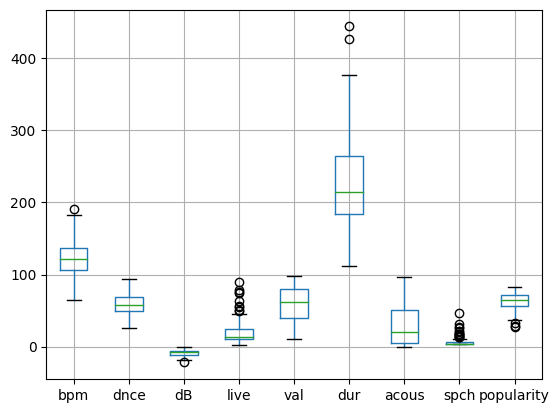

In [459]:
ot_columns = ['bpm','dnce','dB','live','val','dur','acous','spch','popularity']
data_test.boxplot(ot_columns)


In [460]:
dev = data_test['bpm'].quantile(0.50)
ma = data_test['bpm'].quantile(0.90)
print(dev,ma)
data_test['bpm'] = np.where(data_test['bpm'] > ma, dev, data_test['bpm'])

121.0 155.8


<AxesSubplot: >

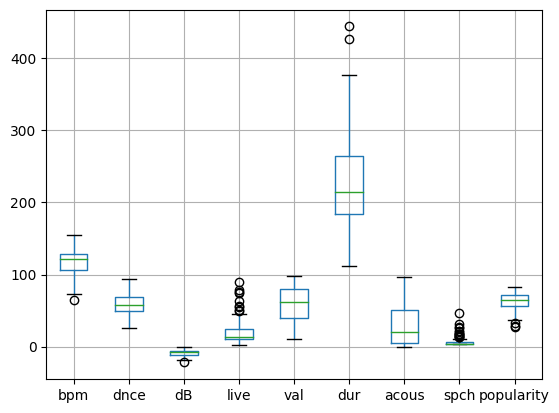

In [461]:
data_test.boxplot(ot_columns)

In [462]:
data_test.drop(columns=['live'],axis=1,inplace=True)

In [463]:
data_test['dur'] = data_test[['dur']]/60

In [464]:

# data_test['aud_mean']  = data_test[['bpm', 'nrgy','dnce','dB','live','val','acous','spch']].mean(axis=1)

In [465]:
data_test

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,spch,popularity,aud_mean
0,454,Pump It,The Black Eyed Peas,2005,154.0,93,65,-3,74,3.550000,1,18,72,58.2
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,121.0,39,30,-15,14,4.866667,26,3,59,43.2
2,456,We Are The Champions - Remastered 2011,Queen,1977,64.0,46,27,-7,18,2.983333,38,3,76,28.0
3,457,Insomnia - Radio Edit,Faithless,2010,127.0,92,71,-9,53,3.600000,6,4,50,49.6
4,458,This Eve of Parting,John Hartford,2018,115.0,46,56,-12,34,2.550000,18,3,44,42.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125.0,57,61,-8,76,3.483333,3,47,78,51.4
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130.0,89,67,-6,80,3.583333,4,3,44,55.0
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84.0,58,78,-7,76,4.216667,43,27,74,54.8
111,566,YMCA - Original Version 1978,Village People,1978,127.0,97,72,-5,73,4.783333,6,14,71,54.6


In [466]:
artist_stats = data_test.groupby("artist").agg({"bpm": "mean", "dnce": "mean","dB": "mean","val": "mean"
                                                   ,"acous": "mean"}).to_dict()
data_test["artist_bpm_mean"] = data_test["artist"].map(artist_stats["bpm"])
data_test["artist_dnce_mean"] = data_test["artist"].map(artist_stats["dnce"])
data_test["artist_dB_mean"] = data_test["artist"].map(artist_stats["dB"])
data_test["artist_val_mean"] = data_test["artist"].map(artist_stats["val"])
data_test["artist_acous_mean"] = data_test["artist"].map(artist_stats["acous"])

In [467]:
data_test[scl_attr] = scaler.transform(data_test[scl_attr])

In [468]:
data_test

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,spch,popularity,aud_mean,artist_bpm_mean,artist_dnce_mean,artist_dB_mean,artist_val_mean,artist_acous_mean
0,454,Pump It,The Black Eyed Peas,2005,2.112833,93,0.339190,1.613557,0.587858,-0.240980,-1.066514,2.215401,0.819388,0.699016,2.470730,0.377900,1.693732,0.670269,-1.142541
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,0.382584,39,-1.935433,-1.731948,-1.865909,1.005975,-0.211710,-0.480003,-0.200637,-1.056540,0.937898,-1.408116,-0.647427,-0.930669,0.041815
2,456,We Are The Champions - Remastered 2011,Queen,1977,-2.606027,46,-2.130401,0.498388,-1.702324,-0.777644,0.198596,-0.480003,1.133242,-2.835503,-0.794203,-0.490973,0.376830,-0.565406,-0.538153
3,457,Insomnia - Radio Edit,Faithless,2010,0.697175,92,0.729126,-0.059196,-0.270960,-0.193627,-0.895554,-0.300310,-0.906809,-0.307503,0.815271,0.812337,-0.062137,-0.308946,-0.959393
4,458,This Eve of Parting,John Hartford,2018,0.067994,46,-0.245713,-0.895572,-1.047986,-1.188034,-0.485248,-0.480003,-1.377590,-1.173577,0.079511,-0.273754,-0.940071,-1.194902,-0.519839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,0.592311,57,0.079233,0.219596,0.669651,-0.304117,-0.998130,7.426515,1.290169,-0.096836,0.692644,0.088276,0.230508,0.763528,-1.069282
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,0.854470,89,0.469169,0.777180,0.833235,-0.209411,-0.963938,-0.480003,-1.377590,0.324497,0.999211,0.522712,0.815797,0.950045,-1.032652
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,-1.557391,58,1.184051,0.498388,0.669651,0.390389,0.369556,3.832643,0.976315,0.301090,-1.453321,1.645006,0.815797,0.833472,0.487474
111,566,YMCA - Original Version 1978,Village People,1978,0.697175,97,0.794115,1.055972,0.546962,0.927053,-0.895554,1.496626,0.740925,0.277682,0.815271,0.884743,1.108442,0.623640,-0.959393


In [469]:
#PCA on test
ot_columns = ['Id','title','artist','year', 'nrgy']
x_pca = pca.transform(data_test[scl_attr])
data_test = pd.concat([data_test[ot_columns].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')

In [470]:
data_test

,Id,title,artist,year,nrgy,0,1,2,3,4,5,6
0,454,Pump It,The Black Eyed Peas,2005,93,-3.942108,0.048870,-2.061977,-1.072693,1.366502,1.449796,0.070566
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,39,2.477238,-1.218426,-2.352408,1.331129,-0.286206,0.694283,0.485689
2,456,We Are The Champions - Remastered 2011,Queen,1977,46,2.215841,-3.543937,0.580699,-1.097852,-1.450419,-0.177892,-0.606367
3,457,Insomnia - Radio Edit,Faithless,2010,92,-1.016270,-0.048838,-0.738296,0.657744,-0.209691,0.262706,-1.245016
4,458,This Eve of Parting,John Hartford,2018,46,1.595509,-0.483201,-0.764737,0.465439,-0.717759,0.836281,-1.982267
...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,57,-2.896066,-0.949336,0.983789,-0.475247,2.972501,5.986374,0.586494
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,89,-2.093036,0.869223,-0.803839,-0.634850,-0.892754,0.184017,-0.289183
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,58,-1.662541,-0.551627,3.754405,-0.564898,2.288800,1.579660,0.699339
111,566,YMCA - Original Version 1978,Village People,1978,97,-3.016596,-0.592342,-0.095145,-0.018245,0.859757,0.629479,0.618865


In [471]:
data_test.drop(columns=['Id','title','nrgy'],axis=1,inplace=True)

In [472]:
# from sklearn import preprocessing
# # scaler=MinMaxScaler(feature_range=(0,1))
# scaler  = preprocessing.MinMaxScaler(feature_range=(0,1))
# scl_attr = ['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','popularity']
# data_test[scl_attr]=scaler.fit_transform(data_test[scl_attr])

In [473]:

# data_test[scl_attr] = std_scaler.fit_transform(data_test[scl_attr])

In [474]:
# data_test['artist'] = lab.fit_transform(data_test['artist'])
# data.drop(columns=['top genre'],axis=1,inplace=True)

In [475]:
data_test

,artist,year,0,1,2,3,4,5,6
0,The Black Eyed Peas,2005,-3.942108,0.048870,-2.061977,-1.072693,1.366502,1.449796,0.070566
1,Elton John,1994,2.477238,-1.218426,-2.352408,1.331129,-0.286206,0.694283,0.485689
2,Queen,1977,2.215841,-3.543937,0.580699,-1.097852,-1.450419,-0.177892,-0.606367
3,Faithless,2010,-1.016270,-0.048838,-0.738296,0.657744,-0.209691,0.262706,-1.245016
4,John Hartford,2018,1.595509,-0.483201,-0.764737,0.465439,-0.717759,0.836281,-1.982267
...,...,...,...,...,...,...,...,...,...
108,50 Cent,2005,-2.896066,-0.949336,0.983789,-0.475247,2.972501,5.986374,0.586494
109,O-Zone,2010,-2.093036,0.869223,-0.803839,-0.634850,-0.892754,0.184017,-0.289183
110,The Notorious B.I.G.,1994,-1.662541,-0.551627,3.754405,-0.564898,2.288800,1.579660,0.699339
111,Village People,1978,-3.016596,-0.592342,-0.095145,-0.018245,0.859757,0.629479,0.618865


In [476]:
oh_artist_t = oh.transform(data_test[["artist"]]).toarray()
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_artist_t)], axis='columns')
data_test.drop(columns='artist',inplace=True)

In [477]:
data_test

,year,0,1,2,3,4,5,6,0,1,...,321,322,323,324,325,326,327,328,329,330
0,2005,-3.942108,0.048870,-2.061977,-1.072693,1.366502,1.449796,0.070566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,2.477238,-1.218426,-2.352408,1.331129,-0.286206,0.694283,0.485689,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1977,2.215841,-3.543937,0.580699,-1.097852,-1.450419,-0.177892,-0.606367,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,-1.016270,-0.048838,-0.738296,0.657744,-0.209691,0.262706,-1.245016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1.595509,-0.483201,-0.764737,0.465439,-0.717759,0.836281,-1.982267,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2005,-2.896066,-0.949336,0.983789,-0.475247,2.972501,5.986374,0.586494,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,2010,-2.093036,0.869223,-0.803839,-0.634850,-0.892754,0.184017,-0.289183,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,1994,-1.662541,-0.551627,3.754405,-0.564898,2.288800,1.579660,0.699339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,1978,-3.016596,-0.592342,-0.095145,-0.018245,0.859757,0.629479,0.618865,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [478]:
data_test

,year,0,1,2,3,4,5,6,0,1,...,321,322,323,324,325,326,327,328,329,330
0,2005,-3.942108,0.048870,-2.061977,-1.072693,1.366502,1.449796,0.070566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,2.477238,-1.218426,-2.352408,1.331129,-0.286206,0.694283,0.485689,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1977,2.215841,-3.543937,0.580699,-1.097852,-1.450419,-0.177892,-0.606367,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,-1.016270,-0.048838,-0.738296,0.657744,-0.209691,0.262706,-1.245016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1.595509,-0.483201,-0.764737,0.465439,-0.717759,0.836281,-1.982267,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2005,-2.896066,-0.949336,0.983789,-0.475247,2.972501,5.986374,0.586494,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,2010,-2.093036,0.869223,-0.803839,-0.634850,-0.892754,0.184017,-0.289183,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,1994,-1.662541,-0.551627,3.754405,-0.564898,2.288800,1.579660,0.699339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,1978,-3.016596,-0.592342,-0.095145,-0.018245,0.859757,0.629479,0.618865,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
# data_test['spch'] = np.log1p(data_test['spch'])
# data_test['dur'] = np.log1p(data_test['dur'])
# data_test['live'] = np.log1p(data_test['live'])



In [480]:
genre_preds = knn.predict(data_test)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [481]:
genre_preds

array(['dance pop', 'adult standards', 'album rock', 'dance pop',
       'adult standards', 'album rock', 'album rock', 'album rock',
       'dance pop', 'album rock', 'dance pop', 'dance pop',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'dance pop', 'album rock',
       'adult standards', 'dance pop', 'adult standards',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'dance pop', 'dance pop', 'dance pop', 'adult standards',
       'album rock', 'dance pop', 'album rock', 'dance pop', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'album rock', 'album rock',
       'album rock', 'dance pop', 'album rock', 'dance pop', 'album rock',
       'dance pop', 'album rock', 'album rock', 'adult standards',
       'album rock', 'album rock', 'adult standards', 'album rock',
       'album rock', 'album rock', 'adult standards', 'dance pop',
       'adult standards', 'album rock', 'album rock

In [482]:
data_test

,year,0,1,2,3,4,5,6,0,1,...,321,322,323,324,325,326,327,328,329,330
0,2005,-3.942108,0.048870,-2.061977,-1.072693,1.366502,1.449796,0.070566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,2.477238,-1.218426,-2.352408,1.331129,-0.286206,0.694283,0.485689,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1977,2.215841,-3.543937,0.580699,-1.097852,-1.450419,-0.177892,-0.606367,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,-1.016270,-0.048838,-0.738296,0.657744,-0.209691,0.262706,-1.245016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1.595509,-0.483201,-0.764737,0.465439,-0.717759,0.836281,-1.982267,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2005,-2.896066,-0.949336,0.983789,-0.475247,2.972501,5.986374,0.586494,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,2010,-2.093036,0.869223,-0.803839,-0.634850,-0.892754,0.184017,-0.289183,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,1994,-1.662541,-0.551627,3.754405,-0.564898,2.288800,1.579660,0.699339,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,1978,-3.016596,-0.592342,-0.095145,-0.018245,0.859757,0.629479,0.618865,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
data_sub = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T

In [484]:
# inverted = lab.inverse_transform(genre_preds)
    

In [485]:
# inverted

In [486]:
spotify_submit['top genre'] = pd.DataFrame(genre_preds)

In [487]:
spotify_submit

,Id,top genre
0,454,dance pop
1,455,adult standards
2,456,album rock
3,457,dance pop
4,458,adult standards
...,...,...
108,563,dance pop
109,564,dance pop
110,565,dance pop
111,566,album rock


In [488]:
spotify_submit.to_csv('spotify_submit_preds_cl_knn.csv',index=False)

# Logistic 

In [489]:
genre_preds_log = log.predict(data_test)

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [490]:
# inverted = lab.inverse_transform(genre_preds)

In [491]:
# inverted

In [492]:
data_sub_log = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_log = pd.DataFrame([data_sub.loc[:,"Id"]]).T
# spotify_submit_log['title'] = pd.DataFrame([data_sub_log.loc[:,"title"]]).T
spotify_submit_log['top genre'] = pd.DataFrame(genre_preds_log)
spotify_submit.to_csv('spotify_submit_preds_cl_log.csv',index=False)

In [493]:
genre_preds

array(['dance pop', 'adult standards', 'album rock', 'dance pop',
       'adult standards', 'album rock', 'album rock', 'album rock',
       'dance pop', 'album rock', 'dance pop', 'dance pop',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'dance pop', 'album rock',
       'adult standards', 'dance pop', 'adult standards',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'dance pop', 'dance pop', 'dance pop', 'adult standards',
       'album rock', 'dance pop', 'album rock', 'dance pop', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'album rock', 'album rock',
       'album rock', 'dance pop', 'album rock', 'dance pop', 'album rock',
       'dance pop', 'album rock', 'album rock', 'adult standards',
       'album rock', 'album rock', 'adult standards', 'album rock',
       'album rock', 'album rock', 'adult standards', 'dance pop',
       'adult standards', 'album rock', 'album rock

# Random forest

In [494]:
genre_preds_rf = rf.predict(data_test)
genre_preds_rf

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array(['dance pop', 'album rock', 'glam rock', 'dance pop', 'dance pop',
       'album rock', 'album rock', 'adult standards', 'dance pop',
       'album rock', 'adult standards', 'barbadian pop',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'british invasion', 'dance pop', 'dance pop', 'dance pop',
       'album rock', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'album rock',
       'bubblegum dance', 'adult standards', 'adult standards',
       'dance pop', 'dance pop', 'adult standards', 'glam rock',
       'dance pop', 'dance pop', 'dance pop', 'album rock',
       'adult standards', 'album rock', 'album rock', 'dance pop',
       'album rock', 'album rock', 'adult standards', 'album rock',
       'adult standards', 'glam rock', 'dance pop', 'album rock',
       'album rock', 'adult standards', 'glam rock', 'dance pop',
       'adult standards', 'album rock', 'adult standards', 'album rock',
       'adult standards'

In [495]:
data_sub_rf = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_rf = pd.DataFrame([data_sub.loc[:,"Id"]]).T
# spotify_submit_rf['title'] = pd.DataFrame([data_sub_rf.loc[:,"title"]]).T
spotify_submit_rf['top genre'] = pd.DataFrame(genre_preds_rf)
spotify_submit_rf.to_csv('spotify_submit_preds_cl_rf.csv',index=False)

<AxesSubplot: >

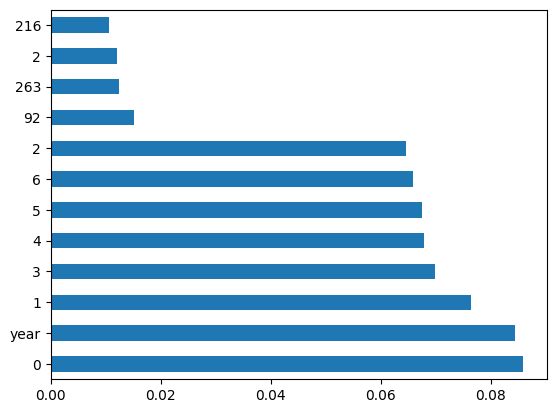

In [496]:
feat_importances = pd.Series(rf.feature_importances_, index=data_test.columns)
feat_importances.nlargest(12).plot(kind='barh')

# SVM

In [497]:
genre_preds_rf = svmcl.predict(data_test)
genre_preds_rf

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array(['adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'adult standar

# navive base

In [498]:
genre_preds_nbc = nbc.predict(data_test)
genre_preds_nbc

C:\Users\sidha\miniconda3\envs\new-env\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array(['dance pop', 'glam rock', 'glam rock', 'glam rock', 'glam rock',
       'dance pop', 'glam rock', 'glam rock', 'glam rock', 'glam rock',
       'brill building pop', 'barbadian pop', 'adult standards',
       'adult standards', 'glam rock', 'british folk', 'british invasion',
       'belgian pop', 'dance pop', 'dance pop', 'glam rock',
       'british invasion', 'adult standards', 'adult standards',
       'art pop', 'glam rock', 'glam rock', 'glam rock',
       'brill building pop', 'barbadian pop', 'glam rock', 'glam rock',
       'glam rock', 'glam rock', 'dance pop', 'glam rock', 'dance pop',
       'adult standards', 'glam rock', 'glam rock', 'dance pop',
       'british invasion', 'album rock', 'glam rock', 'british invasion',
       'glam rock', 'glam rock', 'east coast hip hop', 'glam rock',
       'album rock', 'blues rock', 'glam rock', 'glam rock',
       'adult standards', 'british folk', 'glam rock', 'glam rock',
       'british folk', 'barbadian pop', 'glam rock', 

In [499]:
data_sub_nbc = pd.read_csv("CS98XClassificationTest.csv")
spotify_submit_nbc = pd.DataFrame([data_sub_nbc.loc[:,"Id"]]).T
spotify_submit_nbc['top genre'] = pd.DataFrame(genre_preds_nbc)
spotify_submit_nbc.to_csv('spotify_submit_preds_cl_nbc.csv',index=False)